In [1]:
#Script to obtain data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv("C:/Users/Krishna/Mini Project/Sem-6/Music_Recommentdation_ML/datasets/data_moods.csv")
col_features = df.columns[6:-3]
# col_features data_moodstasets3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#To get consistent output 
np.random.seed(45)

#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.15,random_state=20)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [3]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 10 nodes,input of 10 dim with relu function
    model.add(Dense(10,input_dim=10,activation='relu'))
    #Add 1 layer with 6 nodes,input of 10 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using categorical crossentropy loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [4]:
estimator = KerasClassifier(build_fn=base_model,epochs=350,batch_size=160,verbose=0)

In [5]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Baseline: 80.32% (6.16%)


In [6]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

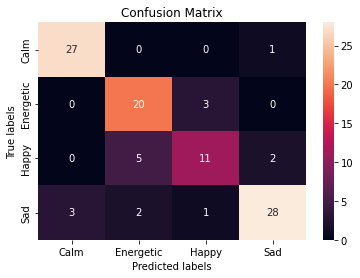

Accuracy Score 0.8349514563106796


In [7]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [8]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=350,
                                                                             batch_size=160,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = id_song
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]

    #return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    print(f"{name_song} by {artist} is a {mood[0].upper()} song")
    return mood[0]
    

In [15]:
music1 = pd.read_csv("C:/Users/Krishna/Mini Project/Sem-6/Music_Recommentdation_ML/krishna.csv", index_col=0)
d = pd.DataFrame(columns=['Name','Artist','Album','Mood'])

In [16]:
# d = pd.DataFrame(columns=['Name','Artist','Album','Mood'])
column_name = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
for n in range(0,500):
    z = music1.iloc[n].values
    song_params = [z[1],z[2],z[4],z[0],z[23],40,z[20],z[9],z[15],z[10],z[16],z[17],z[18],z[12],z[14],z[19],z[11],z[21]]
    song_input = [song_params, column_name]
    # song_input
    mood = predict_mood(song_input)
    df2 = {'Name': z[1], 'Artist': z[2], 'Album': z[1], 'Mood': mood}
    d = d.append(df2, ignore_index = True)
#     print(mood,z[1],n)
#     print(df2)
d

Shooting Star by ['Reflected Illusions'] is a SAD song
Space and Time by ['Reflected Illusions'] is a CALM song
Everything Ends by ['Reflected Illusions'] is a SAD song
Interrupted by ['Lambchop'] is a CALM song
Saturday Option by ['Lambchop'] is a SAD song
Shucks by ['Lambchop'] is a SAD song
Give Me Your Love (Love Song) by ['Lambchop'] is a HAPPY song
Life #2 by ['Lambchop'] is a SAD song
Scamper by ['Lambchop'] is a SAD song
It's Not Alright by ['Lambchop'] is a SAD song
N.O. by ['Lambchop'] is a SAD song
I've Been Lonely For So Long by ['Lambchop'] is a SAD song
Magnificent Obsession by ['Lambchop'] is a SAD song
King Of Nothing Never by ['Lambchop'] is a SAD song
Theme From The Neil Miller Show by ['Lambchop'] is a HAPPY song
Begin by ['Lambchop'] is a SAD song
Betweemus by ['Lambchop'] is a HAPPY song
Soaky In the Pooper by ['Lambchop'] is a CALM song
Because You Are the Very Air He Breathes by ['Lambchop'] is a SAD song
Under the Same Moon by ['Lambchop'] is a SAD song
I Will D

,Name,Artist,Album,Mood
0,Shooting Star,Shooting Star,Shooting Star,Sad
1,Space and Time,Shooting Star,Space and Time,Calm
2,Everything Ends,Shooting Star,Everything Ends,Sad
3,Interrupted,What Another Man Spills,Interrupted,Calm
4,Saturday Option,What Another Man Spills,Saturday Option,Sad
...,...,...,...,...
495,New Abortion - Live,Ozzfest 2001 The Second Millennium,New Abortion - Live,Energetic
496,Blood Brothers - Live,Ozzfest 2001 The Second Millennium,Blood Brothers - Live,Energetic
497,With You - Live,Ozzfest 2001 The Second Millennium,With You - Live,Energetic
498,Super Terrorizer - Live,Ozzfest 2001 The Second Millennium,Super Terrorizer - Live,Energetic


In [17]:
d.to_csv('labelledsongs.csv')